<a href="https://colab.research.google.com/github/Sankarraja007/Machine-Learning/blob/main/Detecting-Roses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn import metrics
import cv2 as cv
from sklearn.model_selection import train_test_split
import os, sys

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/MyDrive/rose data'
path2 = '/content/drive/MyDrive/not rose data'

files1 = os.listdir(path1)
Num_files_F = len(files1)

files2=os.listdir(path2)
Num_files_NF=len(files2)

dataset_len = Num_files_F + Num_files_NF

In [ ]:
Num_files_F

168

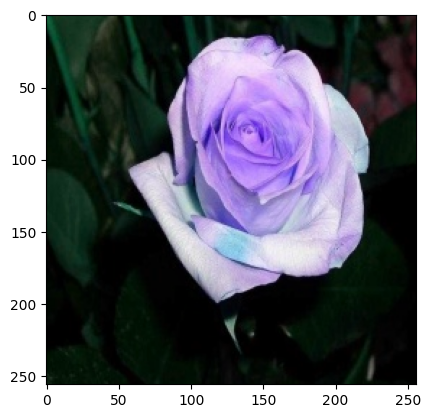

In [ ]:
name=path1+'/'+files1[0]
img=cv.imread(name)
plt.imshow(img)

In [ ]:
data=np.zeros((dataset_len,100,100))
data.shape
label=[]

In [ ]:
data.shape

(439, 100, 100)

In [ ]:
for i in range(Num_files_F):
    name=path1+'/'+files1[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    label.append('Rose')

In [ ]:
for i in range(Num_files_NF):
    name=path2+'/'+files2[i]
    img=cv.imread(name)
    img_gs=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
    img_gs=cv.resize(img_gs,(100,100))
    img_gs=img_gs/255
    data[i+Num_files_F,:,:]=img_gs
    label.append('Not Rose')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lab=le.fit_transform(label)

In [ ]:
label

['Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 'Rose',
 

In [ ]:
lab

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
type(data)

numpy.ndarray

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(data,lab,test_size=0.3,random_state=1)

# Define the CNN architecture
Create the convolutional base

1. Convolutional : 32 filters 3x3
2. Maxpooling: 2x2
3. Convolutional : 64 filters 7x7
4. Convolutional : 32 filters 3x3
5. Maxpooling: 3x3



In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(100,100)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(2,activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10000)             0         
                                                                 
 dense (Dense)               (None, 64)                640064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642210 (2.45 MB)
Trainable params: 642210 (2.45 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


10/10 [==============================] - 1s 9ms/step - loss: 0.3042 - accuracy: 0.9251
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2725 - accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2640 - accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2561 - accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.2489 - accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 0.2353 - accuracy: 1.0000
Epoch 8/100
10/10 [==============================] - 0s 8ms/step - loss: 0.2290 - accuracy: 1.0000
Epoch 9/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2229 - accuracy: 1.0000
Epoch 10/100
10/10 [==============================] - 0s 7ms/step - loss: 0.2171 - accuracy: 1.0000
Epoch 11/100
10/10 [

In [ ]:
y_predict=model.predict(x_test)

5/5 [==============================] - 0s 5ms/step


In [ ]:
y_predict

array([[9.99999940e-01, 3.52308867e-08],
       [9.99999940e-01, 7.12524817e-10],
       [1.17671698e-01, 8.82328272e-01],
       [9.99999940e-01, 4.16514006e-08],
       [9.99999940e-01, 6.49973853e-10],
       [9.99999940e-01, 5.50267026e-13],
       [9.99998868e-01, 1.12165776e-06],
       [1.17671698e-01, 8.82328272e-01],
       [9.99983728e-01, 1.62360357e-05],
       [1.17671698e-01, 8.82328272e-01],
       [9.99996722e-01, 3.20065124e-06],
       [9.99997079e-01, 2.90972844e-06],
       [9.99971569e-01, 2.84178186e-05],
       [9.99999940e-01, 1.07715248e-09],
       [9.99983132e-01, 1.67618164e-05],
       [9.99999821e-01, 6.89816133e-08],
       [1.17671698e-01, 8.82328272e-01],
       [9.99993503e-01, 6.40684266e-06],
       [9.99998152e-01, 1.72860791e-06],
       [9.99906361e-01, 9.35122298e-05],
       [9.99860764e-01, 1.39195254e-04],
       [1.17671698e-01, 8.82328272e-01],
       [9.99999940e-01, 5.83758486e-10],
       [9.99999940e-01, 1.43478285e-11],
       [9.999967

# Evaluation the network

In [ ]:
y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))

In [ ]:
y_pred

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0]

In [ ]:
print('Confusion Matrix:')
print(metrics.confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[87  0]
 [ 0 45]]


In [ ]:
print('Classifier Accuracy:')
print(metrics.accuracy_score(y_test,y_pred))

Classifier Accuracy:
1.0


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('/content/drive/MyDrive/DSA_model/rosemodelcnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
